In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("data/musicgenre.csv")
df = df.dropna(subset=['music_genre'])

In [4]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# Augmentation du dataframe

### Valeurs manquantes

`df_droppped` : toutes les lignes contenant une valeur `None` sont drop
`df_mean` : toutes les valeurs `None` sont remplacées par la valeur moyenne de la colonne
`df_median` : toutes les valeurs `None` sont remplacées par la valeur médiane de la colonne

In [5]:
df_dropped = df.replace("?", None).dropna()
tempo = [float(i) for i in df.tempo if i != "?"]
df_mean = df.replace("?", np.mean(tempo))
df_median = df.replace("?", np.median(tempo))

In [6]:
print(np.mean([float(i) for i in df_dropped.tempo if i != "?"]))
print(np.mean([float(i) for i in df_mean.tempo if i != "?"]))
print(np.mean([float(i) for i in df_median.tempo if i != "?"]))

119.95296059529099
119.95296059529097
119.94559411999998


Pas beaucoup de différence entre les 3 méthodes. On va donc garder `df_dropped` dans un premier temps.

In [7]:
df_dropped["tempo"] = df_dropped["tempo"].astype(float)

In [8]:
print(f'Categorical Features: {len([x for x in df_dropped.columns if df_dropped[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in df_dropped.columns if df_dropped[x].dtype == float])}')

Categorical Features: 6
Numerical Features: 12


### Durée

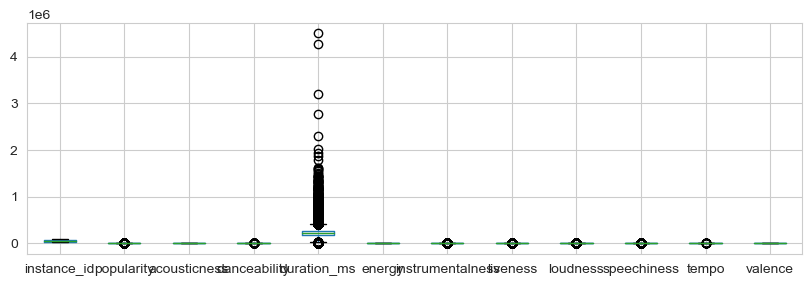

In [9]:
plt.figure(figsize=(10, 3))
df_dropped.select_dtypes(include=np.number).boxplot()
plt.show()

On observe des valeurs extrêmes pour la colonne `duration_ms`. On va donc la normaliser en la passant en secondes.

In [10]:
df_dropped["duration_ms"] = df_dropped["duration_ms"] / 1000

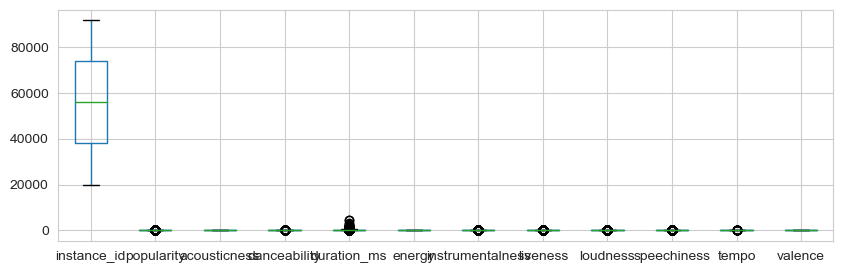

In [11]:
plt.figure(figsize=(10, 3))
df_dropped.select_dtypes(include=np.number).boxplot()
plt.show()

### Transformations des variables catégorielles en variables numériques

Afin de pouvoir utiliser les variables catégorielles dans notre modèle, on va les transformer en variables numériques.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
df_dropped['music_genre'] = encoder.fit_transform(df_dropped['music_genre'])

In [14]:
df_dropped['key'] = encoder.fit_transform(df_dropped['key'])
df_dropped['mode'] = encoder.fit_transform(df_dropped['mode'])
df_dropped['artist'] = encoder.fit_transform(df_dropped['artist_name'])

In [15]:
print(df_dropped['music_genre'].value_counts().sort_index())

music_genre
0    4495
1    4497
2    4470
3    4500
4    4486
5    4466
6    4520
7    4521
8    4504
9    4561
Name: count, dtype: int64


### Délétion des colonnes inutiles

In [16]:
print(f'Categorical Features: {[x for x in df_dropped.columns if df_dropped[x].dtype == object]}')

Categorical Features: ['artist_name', 'track_name', 'obtained_date']


In [17]:
df_dropped.drop(['track_name'],axis=1,inplace=True)

On suppose que le nom de la musique n'a pas d'impact sur le genre de musique.

In [18]:
df_dropped.drop(['instance_id'],axis=1,inplace=True)
df_dropped.drop(['obtained_date'],axis=1,inplace=True)

De la même manière, l'identifiant de la musique ainsi que la date d'obtention n'ont pas d'impact sur le genre de musique.

In [19]:
df_dropped.drop(['artist_name'],axis=1,inplace=True)

On supprime également le nom de l'artiste, ce dernier étant déjà encodé.

### Corrélation

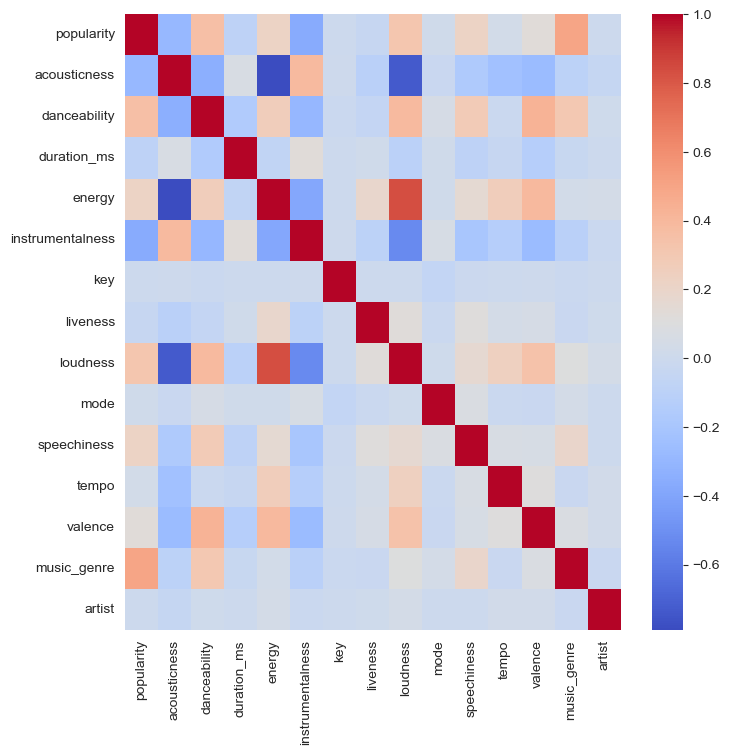

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_dropped.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.show()

On observe une forte corrélation entre `loudness` et `energy`. Cependant, on n'observe pas de corrélation entre `music_genre` et les autres variables pour le moment. Il va falloir creuser les transformations.

# Separation en train et test

On sépare les données en données d'entrainement et de test dès maintenant pour éviter un data leakage lors du traitement des données.

In [21]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_dropped
y = df_dropped['music_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Encodage du style d'un artiste

Les artistes ont souvent un style de musique bien défini. On encode donc cette information avec une liste des codes associés aux genres de musique des chansons qu'ils ont créées. On encode et on sauvegarde le résultat dans la colonne `artist_genre`. On utilise uniquement les données d'entrainement pour éviter un data leakage.

### Mapping du style de musique des artistes

La première étape est de créer un mapping entre les artistes et les genres de musique qu'ils produisent. On utilise que les styles connus dans les données de train ! Ensuite, on ajoute ce mapping dans une colonne `artist_genre` pour chaque artiste.

In [48]:
artist_genre_mapping = X_train.groupby('artist')['music_genre'].agg(lambda x: list(x.unique())).to_dict()
X_train['artist_genre'] = X_train['artist'].map(artist_genre_mapping)
X_test['artist_genre'] = X_test['artist'].map(artist_genre_mapping)

In [49]:
X_test['artist_genre']

2974     [5, 7]
48559    [8, 6]
46703       NaN
24389       [4]
47422    [6, 8]
          ...  
47725    [6, 8]
17226    [8, 0]
27069    [6, 8]
30239       [2]
25243    [6, 8]
Name: artist_genre, Length: 9004, dtype: object

On observe que certains artistes n'ont pas de genre de musique associé. On va donc chercher à remplir ces valeurs manquantes.

In [50]:
X_test['artist_genre'] = X_test['artist_genre'].fillna(-1).apply(lambda x: [-1] if x == -1 else x)

### Encodage du style de musique des artistes

On encode le genre de musique des artistes en utilisant un `MultiLabelBinarizer` sur nos liste de genres de musique.

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer

In [52]:
mlb = MultiLabelBinarizer()
X_train['artist_genre'] = mlb.fit_transform(X_train['artist_genre'])
X_test['artist_genre'] = mlb.transform(X_test['artist_genre'])

/Users/adriensimon/anaconda3/envs/kaggle-explo/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) [-1] will be ignored
  warnings.warn(


On encode ensuite les artistes avec le genre de musique qu'ils produisent.
On finit par supprimer la colonne `artist` qui ne sert plus, et `music_genre` qui ne doit pas apparaitre dans le training.

### Nettoyage

In [53]:
X_train.drop(['artist', 'music_genre'],axis=1,inplace=True)
X_test.drop(['artist', 'music_genre'],axis=1,inplace=True)

# Entrainement du modèle

### Gradient Boosting - All data

accuracy: 0.6228342958685029


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

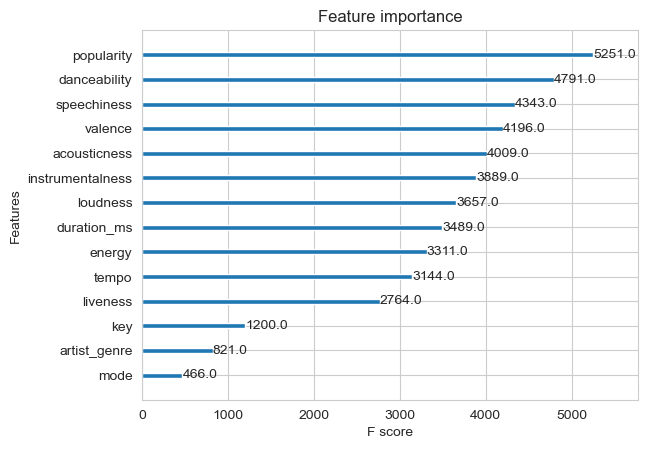

In [54]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=101, random_state=42, learning_rate=0.1)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print("accuracy:",accuracy_score(y_hat, y_test))
plot_importance(model)

### Random Forest - All data

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=35)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print("accuracy:",accuracy_score(y_hat, y_test))

accuracy: 0.5901821412705465


### SVM - All data

In [56]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print("accuracy:",accuracy_score(y_hat, y_test))

accuracy: 0.37250111061750335


# Feature Selection

In [57]:
from sklearn.feature_selection import SelectKBest, chi2

In [59]:
# normalize negative data
X_train = X_train - X_train.min()
X_test = X_test - X_test.min()

In [64]:
selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [65]:
X_train_selected.shape

(36016, 5)

In [68]:
X_train.columns[selector.get_support()]

Index(['popularity', 'duration_ms', 'loudness', 'tempo', 'artist_genre'], dtype='object')

### Gradient Boosting - Selected features

accuracy: 0.43091959129275875


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

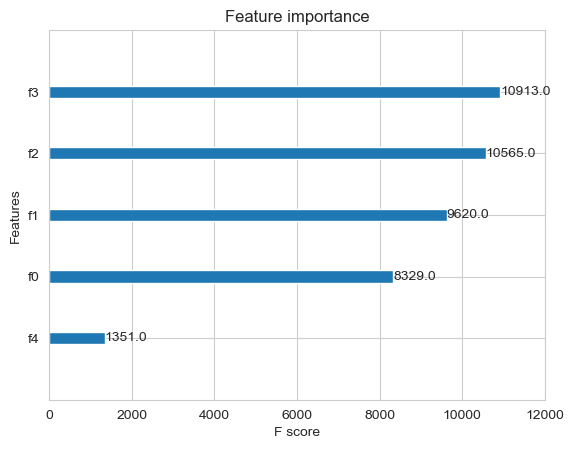

In [66]:
model = XGBClassifier(n_estimators=101, random_state=42, learning_rate=0.1)
model.fit(X_train_selected,y_train)
y_hat = model.predict(X_test_selected)
print("accuracy:",accuracy_score(y_hat, y_test))
plot_importance(model)

### Random Forest - Selected features

In [69]:
model = RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=35)
model.fit(X_train_selected,y_train)
y_hat = model.predict(X_test_selected)
print("accuracy:",accuracy_score(y_hat, y_test))

accuracy: 0.4210350955131053
